<a href="https://colab.research.google.com/github/saraadastan/sara/blob/master/CuRW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://gitlab.synchrotron-soleil.fr/PA/collective-effects/mbtrack2.git

Cloning into 'mbtrack2'...
remote: Enumerating objects: 1364, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1364 (delta 8), reused 0 (delta 0), pack-reused 1340
Receiving objects: 100% (1364/1364), 654.27 KiB | 1.99 MiB/s, done.
Resolving deltas: 100% (937/937), done.


In [2]:
%cd mbtrack2

/content/mbtrack2


In [3]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.4 MB 41.4 MB/s 
     |████████████████████████████████| 1.6 MB 40.0 MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438374 sha256=85e7865f5a6a975a4aeb201c24432ff8b88fad12d86b3946c6b0b54a74eba544
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [4]:
import numpy as np
from mbtrack2.tracking import Synchrotron, Electron
from mbtrack2.utilities import Optics

In [5]:
#%%Elettra 2.0 parameters
h = 432 # Harmonic number of the accelerator.
L = 259.2 # Ring circumference in [m].
E0 = 2.4e9 # Nominal (total) energy of the ring in [eV].
particle = Electron() # Particle considered.
ac = 0.00013968121 # Momentum compaction factor.
U0 = 0.45021768e6 # Energy loss per turn in [eV].
tau = np.array([5.621e-3, 9.217e-3, 6.777e-3]) # Horizontal, vertical and longitudinal damping times in [s].
tune = np.array([32.27, 9.15]) # Horizontal and vertical tunes.
emit = np.array([2.2670e-10, 2.267e-12]) # Horizontal and vertical equilibrium emittance in [m.rad].
sigma_0 = 6.431783914049973e-12 # Natural bunch length in [s].
sigma_delta = 0.0009345738924228619 # Equilibrium energy spread.
chro = [0.93, 2.43] # Horizontal and vertical (non-normalized) chromaticities.

local_beta = np.array([9.37, 2.004]) # Beta function at the tracking location.
local_alpha = np.array([0, 0]) # Alpha function at the tracking location.
local_dispersion = np.array([0, 0, 0, 0]) # Dispersion function and its derivative at the tracking location.
optics = Optics(local_beta=local_beta, local_alpha=local_alpha, 
                  local_dispersion=local_dispersion)

ring = Synchrotron(h=h, optics=optics, particle=particle, L=L, E0=E0, ac=ac, 
                   U0=U0, tau=tau, emit=emit, tune=tune, 
                   sigma_delta=sigma_delta, sigma_0=sigma_0, chro=chro)

In [6]:
from mbtrack2.tracking import Bunch

In [7]:
mybunch = Bunch(ring,  mp_number=1e6, current=1e-3)
mybunch.init_gaussian()

In [8]:
from mbtrack2.impedance import CircularResistiveWall
from mbtrack2.tracking import WakePotential

In [65]:
# Time interval for exact = false could be strat from 1e-1000, but less than this value it gets error
time = np.linspace(0, 10e-12, 10000) # Time points where the wake function will be evaluated in [s].
frequency = np.linspace(1e9, 100e9, 10000) # Frequency points where the impedance will be evaluated in [Hz].
length = ring.L # Beam pipe length in [m].
rho = 1.7e-8 # Effective resistivity to consider in [ohm.m] as in [1].
radius = 7.5e-3 # Beam pipe radius in [m].
exact = True # If False, approxmiated formulas are used for the wake function computations.

rw = CircularResistiveWall(time, frequency, length, rho, radius, exact)

In [66]:
rw.wake_components

array(['Wlong', 'Wxdip', 'Wydip'], dtype='<U5')

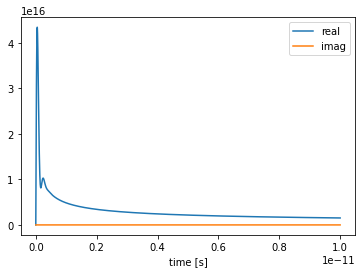

In [67]:
rw.Wydip.data.plot()

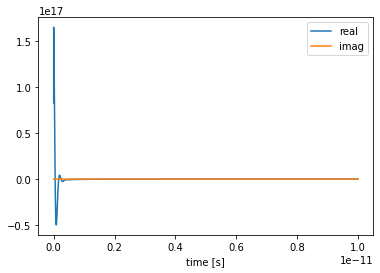

In [68]:
rw.Wlong.data.plot()

In [69]:
rw.Wlong.data

,real,imag
time [s],,
0.000000e+00,8.282928e+16,0.0
1.000100e-15,1.648476e+17,0.0
2.000200e-15,1.633708e+17,0.0
3.000300e-15,1.614701e+17,0.0
4.000400e-15,1.592360e+17,0.0
...,...,...
9.996000e-12,-7.175943e+12,0.0
9.997000e-12,-7.174866e+12,0.0
9.998000e-12,-7.173790e+12,0.0


In [70]:
rw.Wxdip.data

,real,imag
time [s],,
0.000000e+00,0.000000e+00,0.0
1.000100e-15,1.762519e+15,0.0
2.000200e-15,3.512417e+15,0.0
3.000300e-15,5.244204e+15,0.0
4.000400e-15,6.953892e+15,0.0
...,...,...
9.996000e-12,1.529197e+15,0.0
9.997000e-12,1.529120e+15,0.0
9.998000e-12,1.529044e+15,0.0


In [71]:
wp = WakePotential(ring, wakefield=rw, n_bin=60)

In [73]:
wp.track(mybunch)

/content/mbtrack2/mbtrack2/tracking/wakepotential.py:151: RuntimeWarning: invalid value encountered in true_divide
  dipole = dipole/self.profile


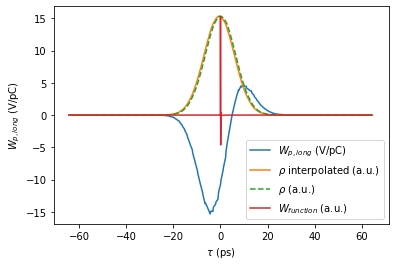

In [75]:
fig = wp.plot_last_wake("Wlong")

In [74]:
wp.Wxdip.real[11000]

8.484734490239147e-09

In [77]:
wp.Wxdip.size

128488